In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../scripts")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
plt.rcParams["figure.figsize"] = (14,6)

In [5]:
obs = pd.read_csv("../data/obs_arg.csv", parse_dates=["date"])
obs = obs.set_index("date")
obs = obs.drop(columns=["Total_Confirmed"])
obs

,I,R,D
date,,,
2020-03-03,1,0,0
2020-03-04,1,0,0
2020-03-05,1,0,0
2020-03-06,2,0,0
2020-03-07,8,0,0
...,...,...,...
2020-06-05,14317,6088,632
2020-06-06,15192,6180,648
2020-06-07,15221,6909,664


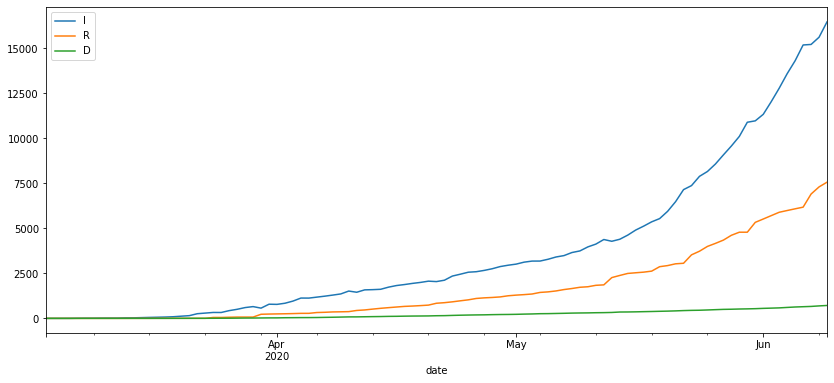

In [6]:
obs.plot()

In [7]:
obs = obs.rolling(window=7, min_periods=1).mean()

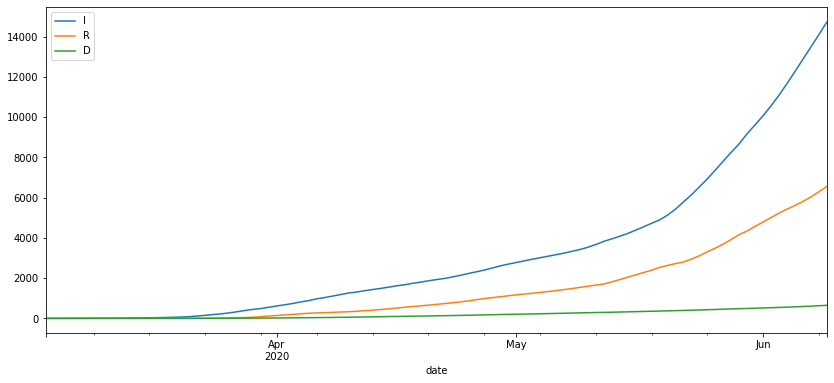

In [8]:
obs.plot()

In [9]:
train = obs["2020-04-01":"2020-05-31"].copy()
train

,I,R,D
date,,,
2020-04-01,617.428571,142.142857,19.571429
2020-04-02,676.142857,169.714286,23.428571
2020-04-03,741.285714,197.428571,27.142857
2020-04-04,816.857143,227.000000,30.714286
2020-04-05,884.428571,256.714286,34.285714
...,...,...,...
2020-05-27,7818.571429,3695.857143,456.714286
2020-05-28,8260.571429,3922.285714,469.857143
2020-05-29,8683.000000,4168.857143,482.285714


In [10]:
test = obs["2020-06-01":"2020-06-15"].copy()
test

,I,R,D
date,,,
2020-06-01,10080.142857,4795.142857,519.285714
2020-06-02,10575.000000,5015.428571,531.428571
2020-06-03,11104.285714,5236.428571,543.285714
2020-06-04,11678.428571,5433.000000,557.571429
2020-06-05,12279.285714,5618.714286,573.571429
2020-06-06,12892.714286,5817.571429,590.714286
2020-06-07,13499.142857,6042.285714,608.571429
2020-06-08,14111.142857,6297.142857,628.142857
2020-06-09,14744.714286,6562.714286,649.285714


In [124]:
from SEIR import SIR, SEIR, SEIRH, SEIARH

In [125]:
train.head(1)

,I,R,D
date,,,
2020-04-01,617.428571,142.142857,19.571429


In [126]:
model = SEIRH(
    population=44e6, 
    initial_infected=617,
    initial_recovered=142,
    initial_exposed=1000,
    initial_dead=19,
    initial_hospitalized=100,
    hospitalized_rate=0.03
)

In [113]:
vars(model).keys()

dict_keys(['population', 'transmission_rate', 'progression_rate', 'recovery_rate_mild', 'hospitalized_rate', 'recovery_rate_hosp', 'mortality_rate', 'initial_exposed', 'initial_infected', 'initial_recovered', 'initial_hospitalized', 'initial_dead'])

In [114]:
model.fit(train[["I", "R", "D"]], 
          estimate=('transmission_rate', 'progression_rate', 'recovery_rate_mild', 'hospitalized_rate', 'recovery_rate_hosp', 'mortality_rate', 'initial_exposed', 'initial_hospitalized'),
          weights=None, method="Nelder-Mead", options={"maxiter": 8000})

 final_simplex: (array([[ 8.89317846e-02,  7.26686034e-01,  9.39873543e-02,
        -5.11487241e-02, -1.57915084e-01,  6.48193512e-03,
         2.26848546e+02,  3.41039804e+02],
       [ 8.89317863e-02,  7.26686126e-01,  9.39873639e-02,
        -5.11487323e-02, -1.57915104e-01,  6.48193569e-03,
         2.26848496e+02,  3.41039788e+02],
       [ 8.89317858e-02,  7.26686099e-01,  9.39873613e-02,
        -5.11487299e-02, -1.57915099e-01,  6.48193551e-03,
         2.26848524e+02,  3.41039796e+02],
       [ 8.89317858e-02,  7.26686070e-01,  9.39873578e-02,
        -5.11487268e-02, -1.57915092e-01,  6.48193538e-03,
         2.26848519e+02,  3.41039794e+02],
       [ 8.89317867e-02,  7.26685990e-01,  9.39873479e-02,
        -5.11487171e-02, -1.57915072e-01,  6.48193497e-03,
         2.26848509e+02,  3.41039782e+02],
       [ 8.89317873e-02,  7.26686035e-01,  9.39873529e-02,
        -5.11487215e-02, -1.57915082e-01,  6.48193529e-03,
         2.26848495e+02,  3.41039779e+02],
       [ 8.893178

In [115]:
T = 75
res = model.simulate(until=T)
idx = pd.date_range(start="2020-04-01", periods=T, freq="D")
res.index = idx

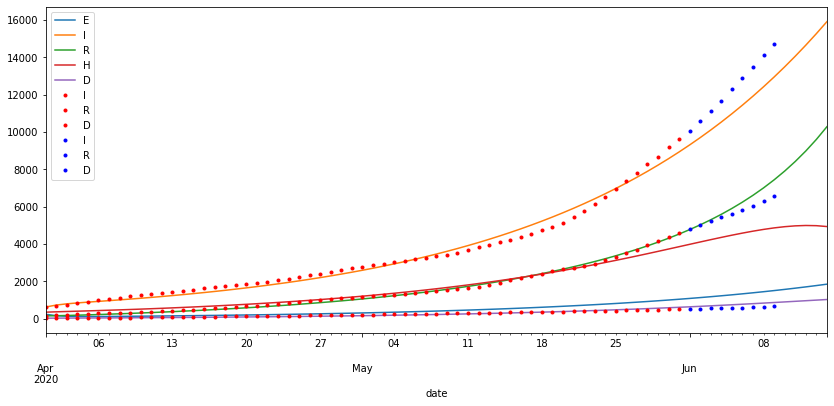

In [116]:
ax = res.plot()
train.plot(ax=ax, style="r.")
test.plot(ax=ax, style="b.")

In [140]:
from SEIR import SEIARH

In [141]:
model = SEIARH(
    population=44e6, 
    initial_infected=617,
    initial_recovered=142,
    initial_exposed=1000,
    initial_dead=19,
    initial_hospitalized=100,
    initial_asymptomatic=500,
    hospitalized_rate=0.01)

In [142]:
model.fit(train[["I", "R", "D"]], 
          estimate=('asymptomatic_rate', 'transmission_rate_s', 'transmission_rate_a', 'progression_rate', 
                    'recovery_rate_mild', 'hospitalized_rate', 'recovery_rate_hosp', 'mortality_rate', 
                    'initial_exposed', 'initial_hospitalized', 'initial_asymptomatic'),
          weights=None, method="Nelder-Mead", options={"maxiter": 8000})

 final_simplex: (array([[ 2.21949365e-02,  1.40088877e-01, -2.67991351e-01,
         1.17320868e-01,  1.52780649e-02,  2.34377690e-02,
         1.08339245e-02,  3.54003105e-03,  1.43909575e+03,
         1.14759770e+02,  3.64389416e+02],
       [ 2.21949363e-02,  1.40088882e-01, -2.67991358e-01,
         1.17320859e-01,  1.52780652e-02,  2.34377693e-02,
         1.08339231e-02,  3.54003090e-03,  1.43909584e+03,
         1.14759791e+02,  3.64389433e+02],
       [ 2.21949307e-02,  1.40088875e-01, -2.67991358e-01,
         1.17320869e-01,  1.52780647e-02,  2.34377694e-02,
         1.08339260e-02,  3.54003106e-03,  1.43909573e+03,
         1.14759768e+02,  3.64389401e+02],
       [ 2.21949488e-02,  1.40088888e-01, -2.67991361e-01,
         1.17320863e-01,  1.52780649e-02,  2.34377703e-02,
         1.08339232e-02,  3.54003084e-03,  1.43909578e+03,
         1.14759781e+02,  3.64389419e+02],
       [ 2.21949459e-02,  1.40088883e-01, -2.67991368e-01,
         1.17320873e-01,  1.52780648e-02,  2

In [143]:
T = 75
res = model.simulate(until=T)
idx = pd.date_range(start="2020-04-01", periods=T, freq="D")
res.index = idx

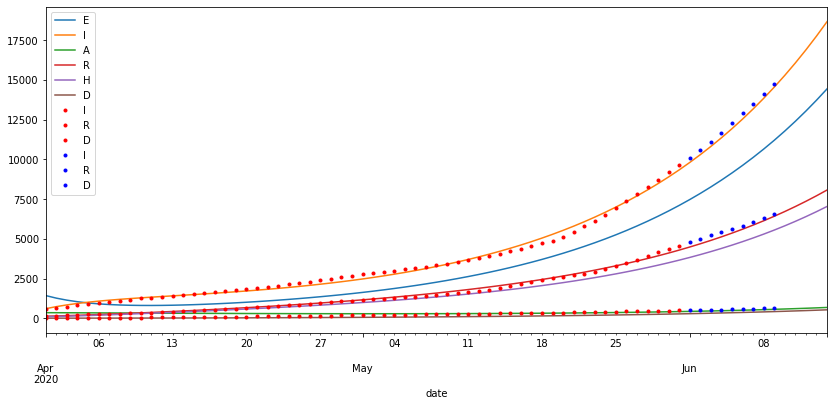

In [144]:
ax = res.plot()
train.plot(ax=ax, style="r.")
test.plot(ax=ax, style="b.")